# 합성곱 신경망 (CNN) : 이미지를 위한 인공신경망

- 데이터 준비

In [17]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  # 케라스 합성곱 층은 3차원 입력 (너비 28, 높이 28, 깊이 1)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


- 레이어 만들기

In [18]:
# 첫 번째 합성곱 층
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', # kerner_size=3 : 3 x 3 x 1 필터 생성 (깊이는 자동으로 결정) # kernel_size = (3,3) -> 가능
          padding='same', input_shape=(28,28,1), name='first_conv2D'))   
model.add(keras.layers.MaxPooling2D(2, name='first_max_pooling')) # (2,2) max pooling -> 4칸 중에 가장 임팩트 있는 값을 꺼낸다. (과대적합 회피)

# 두 번째 합성곱 층
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', # 3 x 3 x 32 필터 생성 (깊이는 자동으로 결정)
          padding='same', name='second_conv2D'))   # kernel_size = (3,3) -> 가능
model.add(keras.layers.MaxPooling2D(2, name='second_max_pooling'))
# convolution과 maxPooling을 언제, 몇 번 할지는 시행착오법으로 결정해야 한다.

# 완전 연결층 (출력층)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

# ====================================================================================== #
# Layer                | OutputStream       | Param
# first_conv2D         | (None, 28, 28, 32) | (3x3x1 + 1) x 32 -> weigh(9*32) + bias(32)
# first_max_pooling    | (None, 14, 14, 32) | 0
# second_conv2D        | (None, 14, 14, 64) | (3x3x32 + 1) x 64 = 18,496
# second_max_pooling   | (None,  7,  7, 64) | 0
# Flatten              | (None, 3136)       | 0
# hidden               | (None, 100)        | 3136(=7*7*64) x 100 + 100(=bias) = 313,700
# Dropout              | (None, 100)        | 0
# output               | (None, 10)         | 1000 + 10 = 1,010
# ====================================================================================== #

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_conv2D (Conv2D)       (None, 28, 28, 32)        320       
                                                                 
 first_max_pooling (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 second_conv2D (Conv2D)      (None, 14, 14, 64)        18496     
                                                                 
 second_max_pooling (MaxPool  (None, 7, 7, 64)         0         
 ing2D)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 100)              

In [19]:
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


- 컴파일 & 학습

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5111 - accuracy: 0.8169 - val_loss: 0.3264 - val_accuracy: 0.8790
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3340 - accuracy: 0.8797 - val_loss: 0.2649 - val_accuracy: 0.9016
Epoch 3/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.2834 - accuracy: 0.8971 - val_loss: 0.2489 - val_accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2531 - accuracy: 0.9066 - val_loss: 0.2324 - val_accuracy: 0.9114
Epoch 5/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2292 - accuracy: 0.9157 - val_loss: 0.2278 - val_accuracy: 0.9160
Epoch 6/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2087 - accuracy: 0.9233 - val_loss: 0.2358 - val_accuracy: 0.9115
Epoch 7/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1922 - accuracy: 0.9279 - val_loss: 0.2202 -

- 결과 확인

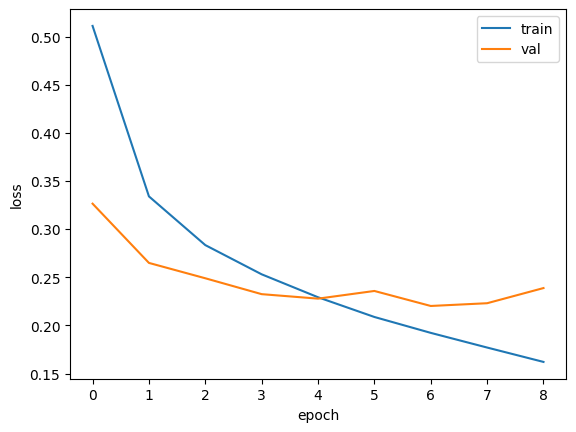

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [22]:
model.evaluate(val_scaled, val_target) # [0.2145286500453949, 0.9247499704360962]

375/375 [==============================] - 2s 5ms/step - loss: 0.2202 - accuracy: 0.9201


[0.2201681286096573, 0.9200833439826965]

In [23]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target) # [0.2353357970714569, 0.9190999865531921]

313/313 [==============================] - 2s 5ms/step - loss: 0.2366 - accuracy: 0.9161


[0.23656366765499115, 0.916100025177002]

# 합성곱 신경망의 시각화 - 가중치 시각화

In [24]:
model = keras.models.load_model("best-cnn-model.h5")
print(model.layers)

[<keras.layers.convolutional.conv2d.Conv2D object at 0x0000022319C289A0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000022319C290C0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000223176C63E0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000022319C2ACB0>, <keras.layers.reshaping.flatten.Flatten object at 0x00000223176C6C50>, <keras.layers.core.dense.Dense object at 0x00000223176C4820>, <keras.layers.regularization.dropout.Dropout object at 0x00000223176C7F10>, <keras.layers.core.dense.Dense object at 0x00000223176C7A90>]


In [25]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # (3, 3, 1, 32) (32,)

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # -0.029786753 0.2856585

(3, 3, 1, 32) (32,)
-0.015258746 0.23379572


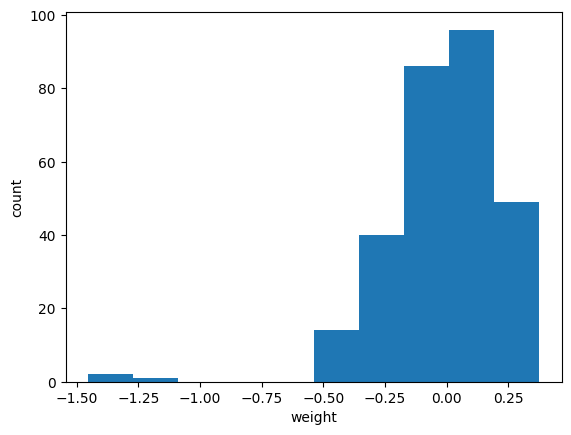

In [26]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

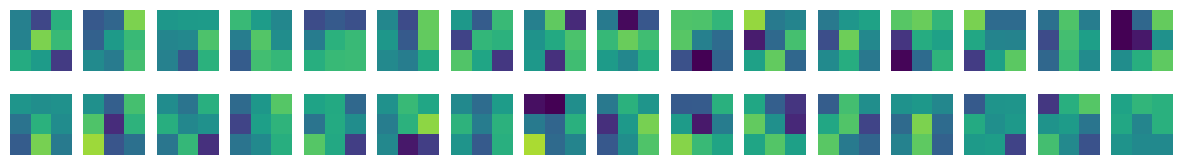

In [27]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

-  학습되지 않은 필터와 비교 해보기

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shpae)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()